# Newton Descent


$$x_{k+1} \leftarrow x_k + \alpha_k p_k$$

Let's use a very simple function to illustrate how gradient descent works. Our function of choice will be

$$ f(x, y) = x^2 + 2y^2 $$

It's obvious that the local (and global) minimum occurs at $x, y =  (0, 0)$ but we can apply the same algorithm to more complex functions where it's not obvious at all where a local minimum occurs.

In [52]:
# Import libraries we need to work with vectors and visualization
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1)

In [53]:
# Initialize x to be some random point in our function's input space
x = np.random.randint(-10, 10, 2)
print(x)

[-5  1]


In [54]:
# Our function f
def f(x: np.array) -> np.int64:
    M = np.array([[1, 0],
                  [0, 2]])
    return x.T @ M @ x

print(f(x))

27


In [55]:
# The gradient of f
def grad_f(x: np.array) -> np.array:
    M = np.array([[1, 0],
                  [0, 2]])
    return M @ x + M.T @ x

grad_f(x)

array([-10,   4])

In [56]:
# The hessian of f
def hessian_f() -> np.array:
    M = np.array([[1, 0],
                  [0, 2]])
    return M + M.T

In [57]:
# The inverse of the hessian of f
inverse_hessian_f = np.linalg.inv(hessian_f())

In [58]:
# Set our hyperparameters
step_size = 1
stopping_criteria = 10e-9

In [59]:
# Keep track of the history of our x and f(x) values as newton descent progresses
x_history = [x]
f_history = [f(x)]

# Use newton descent to find the minimum of our function
while True:
    x = x + step_size * -1 * inverse_hessian_f @ grad_f(x)
    
    x_history.append(x)
    f_history.append(f(x))
    
    change = abs(f_history[-1] - f_history[-2])
    if change < stopping_criteria:
        break

print(f'Final x value: {x}')
print(f'Final f(x) value: {f(x)}')
print(f'It took {len(f_history)-1} iterations of gradient descent to reach convergence.')

Final x value: [0. 0.]
Final f(x) value: 0.0
It took 2 iterations of gradient descent to reach convergence.


Text(0.5, 0, 'iteration')

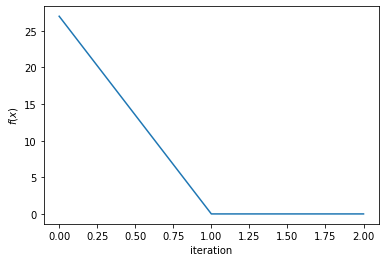

In [60]:
# Let's visualize how f(x) changes as we perform more iterations of gradient descent
plt.plot(f_history)
# set y and x axis labels
plt.ylabel('$f(x)$')
plt.xlabel('iteration')
